In [1]:
import torch, torchvision
import sys # Python system library needed to load custom functions
import math # module with access to mathematical functions
import os # for changing the directory

import numpy as np  # for performing calculations on numerical arrays
import pandas as pd  # home of the DataFrame construct, _the_ most important object for Data Science
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # allows creation of insightful plots

sys.path.append('../audio_preprocessing')
sys.path.append('../src')
sys.path.append('../model_training_utils')


import preprocessing_func_3
import preprocessing_func_2
from generator_to_dataset_3 import NormalisedDataSet
from gdsc_utils import PROJECT_DIR
import model_training
import model_eval

os.chdir(PROJECT_DIR) # changing our directory to root

In [2]:
#poor formorming classes = 8, 28, 30, 52, 57, 58

In [3]:
df_big_long_wav = pd.read_csv('data/metadata.csv')
df_val_long_wav = df_big_long_wav[df_big_long_wav["subset"]=="validation"]
df_val_long_wav.head()

,file_name,unique_file,path,species,label,subset,sample_rate,num_frames,length
4,Atrapsaltacorticina_GBIF2901504947_IN62966536_...,Atrapsaltacorticina_GBIF2901504947_IN62966536_...,data/val/Atrapsaltacorticina_GBIF2901504947_IN...,Atrapsaltacorticina,3,validation,44100,502740,11.400000
9,Chorthippusbrunneus_XC751398-dat022-008_edit5.wav,Chorthippusbrunneus_XC751398-dat022-008,data/val/Chorthippusbrunneus_XC751398-dat022-0...,Chorthippusbrunneus,10,validation,44100,220500,5.000000
10,Psaltodaplaga_GBIF3031797565_IN68469430_159997...,Psaltodaplaga_GBIF3031797565_IN68469430_159997,data/val/Psaltodaplaga_GBIF3031797565_IN684694...,Psaltodaplaga,53,validation,44100,238140,5.400000
11,Omocestusviridulus_XC752267-dat013-003_edit2.wav,Omocestusviridulus_XC752267-dat013-003,data/val/Omocestusviridulus_XC752267-dat013-00...,Omocestusviridulus,39,validation,44100,1375437,31.189048
15,Omocestusviridulus_XC752263-dat012-007_edit1.wav,Omocestusviridulus_XC752263-dat012-007,data/val/Omocestusviridulus_XC752263-dat012-00...,Omocestusviridulus,39,validation,44100,970200,22.000000


In [7]:
df_val_28 = df_val_long_wav[df_val_long_wav["label"] == 28]
df_val_28

,file_name,unique_file,path,species,label,subset,sample_rate,num_frames,length
709,Gryllusbimaculatus_XC751729-dat007-025.wav,Gryllusbimaculatus_XC751729-dat007-025,data/val/Gryllusbimaculatus_XC751729-dat007-02...,Gryllusbimaculatus,28,validation,44100,4053162,91.908435
895,Gryllusbimaculatus_GBIF3384375694_IN95557245_3...,Gryllusbimaculatus_GBIF3384375694_IN95557245_3...,data/val/Gryllusbimaculatus_GBIF3384375694_IN9...,Gryllusbimaculatus,28,validation,44100,523264,11.865397
1081,Gryllusbimaculatus_XC751728-dat007-024.wav,Gryllusbimaculatus_XC751728-dat007-024,data/val/Gryllusbimaculatus_XC751728-dat007-02...,Gryllusbimaculatus,28,validation,44100,10131066,229.729388
1617,Gryllusbimaculatus_XC753100-Gryllus-bimaculatu...,Gryllusbimaculatus_XC753100-Gryllus-bimaculatu...,data/val/Gryllusbimaculatus_XC753100-Gryllus-b...,Gryllusbimaculatus,28,validation,44100,1064843,24.146100


In [10]:
file_path = df_val_28.iloc[0]["path"]
file_path

'data/val/Gryllusbimaculatus_XC751729-dat007-025.wav'

In [12]:
wav = preprocessing_func_2.load_wav(file_path)
wav = preprocessing_func_2.normalise_wav(wav)
peaks = preprocessing_func_2.find_wav_peaks(wav)

In [13]:
peaks

array([  64627,  138982,  220258,  296342,  383185,  452451,  519547,
        587341,  660560,  726711,  795410,  900057, 1004372, 1091393,
       1213339, 1284379, 1371321, 1437777, 1525926, 1606400, 1733558,
       1839597, 1954416, 2030030, 2099635, 2168203, 2248087, 2319574,
       2447901, 2520372, 2613035, 2743083, 2872347, 2950605, 3034985,
       3169657, 3276698, 3343522, 3434203, 3520941, 3610936, 3717776,
       3790897, 3864155, 3946865, 4015291], dtype=int64)

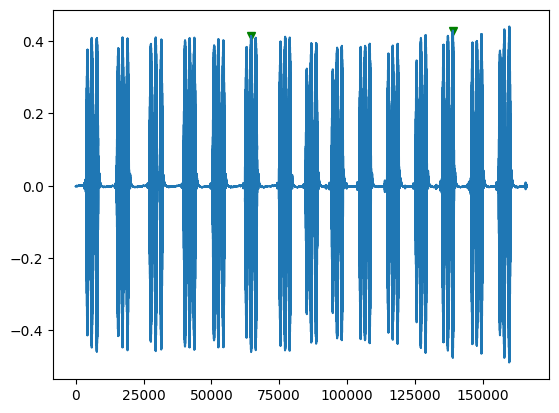

In [14]:
import matplotlib.pyplot as plt

plt.plot(peaks[:2], wav[:166200][peaks[:2]], "vg")
plt.plot(wav[:166200])